In [29]:
# Problem 1 : Some income data, lognormal distribution, and GMM
import numpy as np
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib notebook

income = np.loadtxt('incomes.txt')

<IPython.core.display.Javascript object>


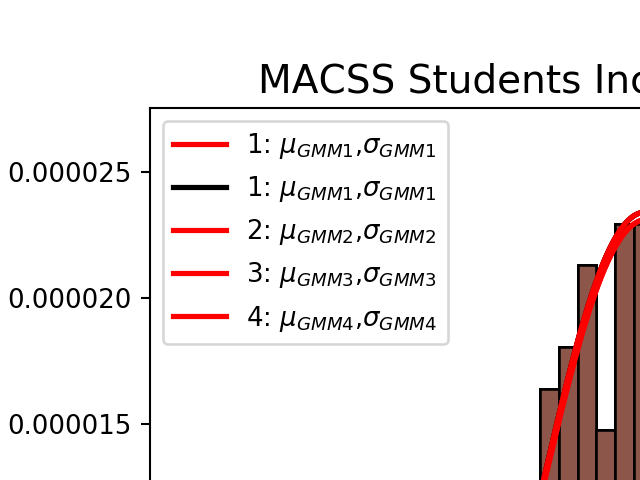

Text(0,0.5,'Percent of observations')

In [30]:
# (a)
plt.hist(income, 30, normed = True)
plt.title('MACSS Students Income Histrogram', fontsize = 15)
plt.xlabel('Income ($)')
plt.ylabel('Percent of observations')

In [31]:
def calculate_lognorm_pdf(xvals, mu, sigma):
    
    pdf_vals = sts.lognorm.pdf(xvals, sigma, loc = 0, scale = np.exp(mu))
    
    return pdf_vals


def data_moments(xvals):
    
    mean_data = xvals.mean()
    sd_data = np.sqrt(xvals.var())
    
    return mean_data, sd_data


def model_moments(mu, sigma):
    
    mean_model = np.exp(mu + (sigma ** 2) / 2)
    sd_model = np.sqrt((np.exp(sigma ** 2) - 1) * np.exp(2 * mu + sigma ** 2))
    
    return mean_model, sd_model


def err_vec(xvals, mu, sigma, simple):
    
    mean_data, sd_data = data_moments(xvals)
    moms_data = np.array([[mean_data], [sd_data]])
    mean_model, sd_model = model_moments(mu, sigma)
    moms_model = np.array([[mean_model], [sd_model]])
    
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec


def crit(params, *args):

    mu, sigma = params
    xvals, W = args
    err = err_vec(xvals, mu, sigma, simple = False)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val

In [32]:
mu_init = 11
sigma_init = 0.5

params_init = np.array([mu_init, sigma_init])
W_hat = np.eye(2)
gmm_args = (income, W_hat)

results_1 = opt.minimize(crit, params_init, args = (gmm_args), method = 'L-BFGS-B', bounds = ((None, None), (1e-10, None)))
mu_GMM1, sigma_GMM1 = results_1.x
print('mu_GMM1 = ', mu_GMM1, ' sigma_GMM1 = ', sigma_GMM1)

mu_GMM1 =  11.3318807729154  sigma_GMM1 =  0.20869666648181137


In [33]:
crit_1 = crit(results_1.x, income, W_hat).reshape(1,)[0]

print('GMM criterion function at the estimated parameter values =', crit_1)

mean_data, sd_data = data_moments(income)
mean_model, sd_model = model_moments(mu_GMM1, sigma_GMM1)

print('Mean of points =', mean_data, ', Standard Deviation of points =', sd_data)
print('Mean of model =', mean_model, ', Standard Deviation of model =', sd_model)
print('The data moments of the points and the model are amlost the same here.')

GMM criterion function at the estimated parameter values = 6.995503784495091e-15
Mean of points = 85276.82360625811 , Standard Deviation of points = 17992.542128046523
Mean of model = 85276.81764993032 , Standard Deviation of model = 17992.541300212713
The data moments of the points and the model are amlost the same here.


In [35]:
# Plot the histogram of the data
plt.hist(income, 30, edgecolor = 'black', normed = True)
plt.title('MACSS Students Income distribution', fontsize = 15)
plt.xlabel('Total income')
plt.ylabel('Percent of income')
plt.xlim([0, 150000])

# Plot the GMM estimated distribution
xvals = np.linspace(1e-10, 150000, 500000)
plt.plot(xvals, calculate_lognorm_pdf(xvals, mu_GMM1, sigma_GMM1),
         linewidth = 2, color = 'r', label ='1: $\mu_{GMM1}$,$\sigma_{GMM1}$')
plt.legend(loc = 'upper left')

plt.savefig('GMM1plots.png')

In [36]:
# (c)
err1 = err_vec(income, mu_GMM1, sigma_GMM1, simple = False)
VCV2 = np.dot(err1, err1.T) / income.shape[0]
W_hat2 = lin.pinv(VCV2)

params_init = np.array([mu_GMM1, sigma_GMM1])
gmm_args = (income, W_hat2)

results_2 = opt.minimize(crit, params_init, args = (gmm_args), method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
mu_GMM2, sigma_GMM2 = results_2.x
print('mu_GMM2 = ', mu_GMM2, 'sigma_GMM2 = ', sigma_GMM2)

mu_GMM2 =  11.331880811066142 sigma_GMM2 =  0.20869667679522338


In [37]:
err2 = err_vec(income, mu_GMM2, sigma_GMM2, simple = False).reshape(2,)
crit_2 = crit(results_2.x, income, W_hat).reshape(1,)[0]

print('GMM criterion function at the estimated parameter values =', crit_2)

mean_data, sd_data = data_moments(income)
mean_model, sd_model = model_moments(mu_GMM2, sigma_GMM2)

print('Mean of points =', mean_data, ', Standard Deviation of points =', sd_data)
print('Mean of model =', mean_model, ', Standard Deviation of model =', sd_model)
print('The data moments of the points and the model are almost the same here.')

GMM criterion function at the estimated parameter values = 2.879474181656097e-15
Mean of points = 85276.82360625811 , Standard Deviation of points = 17992.542128046523
Mean of model = 85276.82108685197 , Standard Deviation of model = 17992.542934031037
The data moments of the points and the model are almost the same here.


In [38]:
# Plot the histogram of the data
count, bins, ignored = plt.hist(income, 30, edgecolor = 'black', normed = True)
plt.title('MACSS Students Income distribution', fontsize = 15)
plt.xlabel('Total income')
plt.ylabel('Percent of income')
plt.xlim([0, 150000])

# Plot the GMM1 estimated distribution
xvals = np.linspace(1e-10, 150000, 500000)
plt.plot(xvals, calculate_lognorm_pdf(xvals, mu_GMM1, sigma_GMM1),
         linewidth = 2, color = 'k', label ='1: $\mu_{GMM1}$,$\sigma_{GMM1}$')
plt.legend(loc = 'upper left')

# Plot the GMM2 estimated distributionc
plt.plot(xvals, calculate_lognorm_pdf(xvals, mu_GMM2, sigma_GMM2),
         linewidth = 2, color = 'r', label ='2: $\mu_{GMM2}$,$\sigma_{GMM2}$')
plt.legend(loc = 'upper left')

plt.savefig('GMM2plots.png')

In [39]:
# (d)

def data_moments3(xvals):
    
    bpct_1_dat = xvals[xvals < 75000].shape[0] / xvals.shape[0]
    bpct_2_dat = (xvals[(xvals >= 75000) & (xvals < 100000)].shape[0] / xvals.shape[0])
    bpct_3_dat = xvals[xvals >= 100000].shape[0] / xvals.shape[0]

    return bpct_1_dat, bpct_2_dat, bpct_3_dat


def model_moments3(mu, sigma):

    xfx = lambda x: calculate_lognorm_pdf(x, mu, sigma)
    (bpct_1_mod, bp_1_err) = intgr.quad(xfx, 0, 75000)
    (bpct_2_mod, bp_2_err) = intgr.quad(xfx, 75000, 100000)
    (bpct_3_mod, bp_3_err) = intgr.quad(xfx, 100000, np.inf)
    
    return bpct_1_mod, bpct_2_mod, bpct_3_mod


def err_vec3(xvals, mu, sigma, simple):

    bpct_1_dat, bpct_2_dat, bpct_3_dat = data_moments3(xvals)
    moms_data = np.array([[bpct_1_dat], [bpct_2_dat], [bpct_3_dat]])
    bpct_1_mod, bpct_2_mod, bpct_3_mod = model_moments3(mu, sigma)
    moms_model = np.array([[bpct_1_mod], [bpct_2_mod], [bpct_3_mod]])
    
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = 100 * ((moms_model - moms_data) / moms_data)
    
    return err_vec


def crit3(params, *args):

    mu, sigma = params
    xvals, W = args
    err = err_vec3(xvals, mu, sigma, simple = False)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val

In [40]:
W_hat = np.eye(3)
gmm_args = (income, W_hat)

results_3 = opt.minimize(crit3, params_init, args = (gmm_args), method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
mu_GMM1_3, sigma_GMM1_3 = results_3.x
print('mu_GMM1_3 =', mu_GMM1_3, ' sigma_GMM1_3 =', sigma_GMM1_3)

c:\users\liaoa\appdata\local\programs\python\python36\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


mu_GMM1_3 = 11.335681327351276  sigma_GMM1_3 = 0.2105984538793644


In [41]:
crit_3 = crit3(results_3.x, income, W_hat).reshape(1,)[0]
print('GMM criterion function at the estimated parameter values =', crit_3)

moment1_data, moment2_data, moment3_data = data_moments3(income)
moment1_model, moment2_model, moment3_model = model_moments3(mu_GMM1_3, sigma_GMM1_3)

print('First moment of data =', moment1_data, ', Second moment of data =', moment2_data,', Third moment of data =', moment3_data)
print('First moment of model =', moment1_model, ', Second moment of model ', moment2_model,', Third moment of model ', moment3_model)
print('The data moments of the points and the model are almost the same here.')

GMM criterion function at the estimated parameter values = 2.5023261979433576e-11
First moment of data = 0.3 , Second moment of data = 0.5 , Third moment of data = 0.2
First moment of model = 0.3000000038913972 , Second moment of model  0.5000000055157822 , Third moment of model  0.19999999059282075
The data moments of the points and the model are almost the same here.


In [42]:
# Plot the histogram of the data
count, bins, ignored = plt.hist(income, 30, edgecolor = 'black', normed = True)
plt.title('MACSS Students Income distribution', fontsize = 15)
plt.xlabel('Total income')
plt.ylabel('Percent of income')
plt.xlim([0, 150000])

# Plot the GMM3 estimated distribution
xvals = np.linspace(1e-10, 150000, 500000)
plt.plot(xvals, calculate_lognorm_pdf(xvals, mu_GMM1_3, sigma_GMM1_3),
         linewidth = 2, color = 'r', label ='3: $\mu_{GMM3}$,$\sigma_{GMM3}$')
plt.legend(loc = 'upper left')

plt.savefig('GMM3plots.png')

In [43]:
# (e)
err1_3 = err_vec3(income, mu_GMM1_3, sigma_GMM1_3, simple = False)
VCV2_3 = np.dot(err1_3, err1_3.T) / income.shape[0]
W_hat2_3 = lin.pinv(VCV2_3)

params_init = np.array([mu_GMM1_3, sigma_GMM1_3])
gmm_args = (income, W_hat2_3)

results_4 = opt.minimize(crit3, params_init, args = (gmm_args), method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
mu_GMM2_3, sigma_GMM2_3 = results_4.x
print('mu_GMM2_3=', mu_GMM2_3, ' sigma_GMM2_3=', sigma_GMM2_3)

c:\users\liaoa\appdata\local\programs\python\python36\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
c:\users\liaoa\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:1652: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\liaoa\appdata\local\programs\python\python36\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


mu_GMM2_3= 11.335681328761655  sigma_GMM2_3= 0.21059845576470915


In [44]:
err2_3 = err_vec3(income, mu_GMM2_3, sigma_GMM2_3, simple = False)
crit_4 = crit3(results_4.x, income, W_hat).reshape(1,)[0]

print('GMM criterion function at the estimated parameter values =', crit_4)

moment1_data, moment2_data, moment3_data = data_moments3(income)
moment1_model, moment2_model, moment3_model = model_moments3(mu_GMM2_3, sigma_GMM2_3)

print('First moment of data =', moment1_data, ', Second moment of data =', moment2_data,', Third moment of data =', moment3_data)
print('First moment of model =', moment1_model, ', Second moment of model ', moment2_model,', Third moment of model ', moment3_model)
print('The data moments of the points and the model are almost the same here.')

GMM criterion function at the estimated parameter values = 8.684849095736503e-12
First moment of data = 0.3 , Second moment of data = 0.5 , Third moment of data = 0.2
First moment of model = 0.30000000319517534 , Second moment of model  0.5000000022277344 , Third moment of model  0.19999999457709025
The data moments of the points and the model are almost the same here.


In [45]:
# Plot the histogram of the data
count, bins, ignored = plt.hist(income, 30, edgecolor = 'black', normed = True)
plt.title('MACSS Students Income distribution', fontsize = 15)
plt.xlabel('Total income')
plt.ylabel('Percent of income')
plt.xlim([0, 150000])

# Plot the GMM3 estimated distribution
xvals = np.linspace(1e-10, 150000, 500000)
plt.plot(xvals, calculate_lognorm_pdf(xvals, mu_GMM2_3, sigma_GMM2_3),
         linewidth = 2, color = 'r', label ='4: $\mu_{GMM4}$,$\sigma_{GMM4}$')
plt.legend(loc = 'upper left')

plt.savefig('GMM4plots.png')

In [46]:
# (f)

print('The mu, sigma and criterion dunction value for each estimation are as follows:')
print('GGM1:', mu_GMM1, sigma_GMM1, crit_1, err1)
print('GGM2:', mu_GMM2, sigma_GMM2, crit_2, err2)
print('GGM3:', mu_GMM1_3, sigma_GMM1_3, crit_3, err1_3)
print('GGM4:', mu_GMM2_3, sigma_GMM2_3, crit_4, err2_3)

print('From the comparasion above, I think that the second method yields the best result.\
The mu and sigma estimated by four methods are really close to each other.\
So we have to utilize other standards for comparasion.\
For the second one, it has the smallest criterion function value.\
And it also has the smallest error vector.\
This means that given that these four methods are equally effective, but the second method\
managed to mininize the error by a relatively easy method.\
Therefore, I think it should be the best estimation.')

The mu, sigma and criterion dunction value for each estimation are as follows:
GGM1: 11.3318807729154 0.20869666648181137 6.995503784495091e-15 [[-6.98469706e-08]
 [-4.60098303e-08]]
GGM2: 11.331880811066142 0.20869667679522338 2.879474181656097e-15 [-2.95438554e-08  4.47954773e-08]
GGM3: 11.335681327351276 0.2105984538793644 2.5023261979433576e-11 [[ 1.29713240e-06]
 [ 1.10315643e-06]
 [-4.70358963e-06]]
GGM4: 11.335681328761655 0.21059845576470915 8.684849095736503e-12 [[ 1.06505845e-06]
 [ 4.45546888e-07]
 [-2.71145488e-06]]
From the comparasion above, I think that the second method yields the best result.The mu and sigma estimated by four methods are really close to each other.So we have to utilize other standards for comparasion.For the second one, it has the smallest criterion function value.And it also has the smallest error vector.This means that given that these four methods are equally effective, but the second methodmanaged to mininize the error by a relatively easy method.T

In [47]:
# Problem 2 : Linear regression and GMM

data = pd.read_csv('sick.txt') 
variables = (data['sick'], data['age'], data['children'], data['avgtemp_winter'])

In [48]:
def model_moments(params, variables):
    b0, b1, b2, b3, sigma, W = params
    sick, age, children, winter = variables
    mons_model = b0 + b1 * age + b2 * children + b3 * winter
    return mons_model

def err_vec(params, variables):
    sick, age, children, winter = variables
    moms_data = sick
    moms_model = model_moments(params, variables)
    err_vec = moms_model - moms_data

    return err_vec

def crit(params, *variables):
    b0, b1, b2, b3, sigma, W = params
    sick, age, children, winter = variables
    err = err_vec(params, variables)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val

In [49]:
b0_init, b1_init, b2_init, b3_init, sigma_init, W_init = (0.1, 0.1, 0.1, 0.1, 0.1, np.eye(1))
params_init = np.array([b0_init, b1_init, b2_init, b3_init, sigma_init, W_init])
gmm_args = (variables)

results = opt.minimize(crit, params_init, args = (gmm_args), method = 'L-BFGS-B',
                       bounds=((None, None), (None, None),(None, None), (None, None),(1e-10, None),(None, None)))

b0_GMM, b1_GMM, b2_GMM, b3_GMM, sigma_GMM, W_GMM = results.x

In [50]:
print('Estimates for b0, b1, b2, b3, sigma**2 and W are : ', b0_GMM, b1_GMM, b2_GMM, b3_GMM, sigma_GMM ** 2, W_GMM)
print('The value of GMM criterion function is: ', crit(results.x, *variables))

Estimates for b0, b1, b2, b3, sigma**2 and W are :  0.25165800867999344 0.012931797986714592 0.4005162485175238 -0.00999102060798633 0.010000000000000002 0.8386570169653098
The value of GMM criterion function is:  0.0015274479180575442
